# Classification algorithms

### Dataset description, visualisation, and pre-processing

<div class="alert alert-block alert-warning">The Heart Disease Detection dataset is composed of a set of characteristics used to determine if a patient has heart disease or not. Its main purpose is to perform classification based on the target variable, 'HeartDisease,' which indicates the presence of heart disease in the patient. This variable has integer values where 0 represents no disease and 1 indicates the presence of disease.
<div/>

<div class="alert alert-block alert-danger"> 
    
1. Import the Heart Disease Detection dataset.
2. Display and try to understand each feature in this dataset.
3. Display a summary of the dataset.
4. Verify if the dataset contains any missing values.
5. Plot the distribution of samples according to the target variable HeartDisease. Determine if the dataset is balanced.
6. Apply dummy encoding to all categorical features in the dataset.
7. Display the Pearson correlation matrix. Is there a correlation with the class and between features by considering a thresholed of 0.5?
8. Display the distribution of all features on all the scaled data (except binary features) using a histplot. What do you observe?
9. Split the data into a training and a testing set using a ratio of 0.3.
10. Normalize the data using z-score scaling.
<div/>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./heart.csv')
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
print("Dataset Info:")
print(df.info())
print("\nDataset Summary:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None

Dataset Summary:
              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.39

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


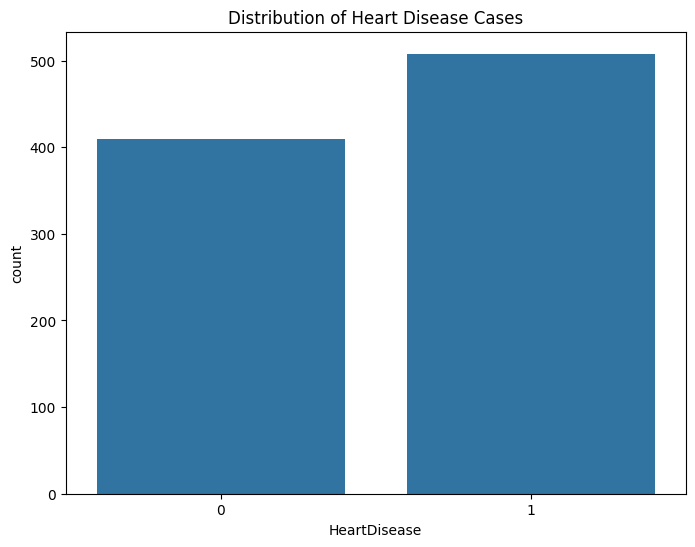

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDisease')
plt.title('Distribution of Heart Disease Cases')
plt.show()

In [6]:
balance = df['HeartDisease'].value_counts(normalize=True)
print("\nClass Distribution:")
print(balance)


Class Distribution:
HeartDisease
1    0.553377
0    0.446623
Name: proportion, dtype: float64


In [7]:
# First, identify categorical columns (excluding target)
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


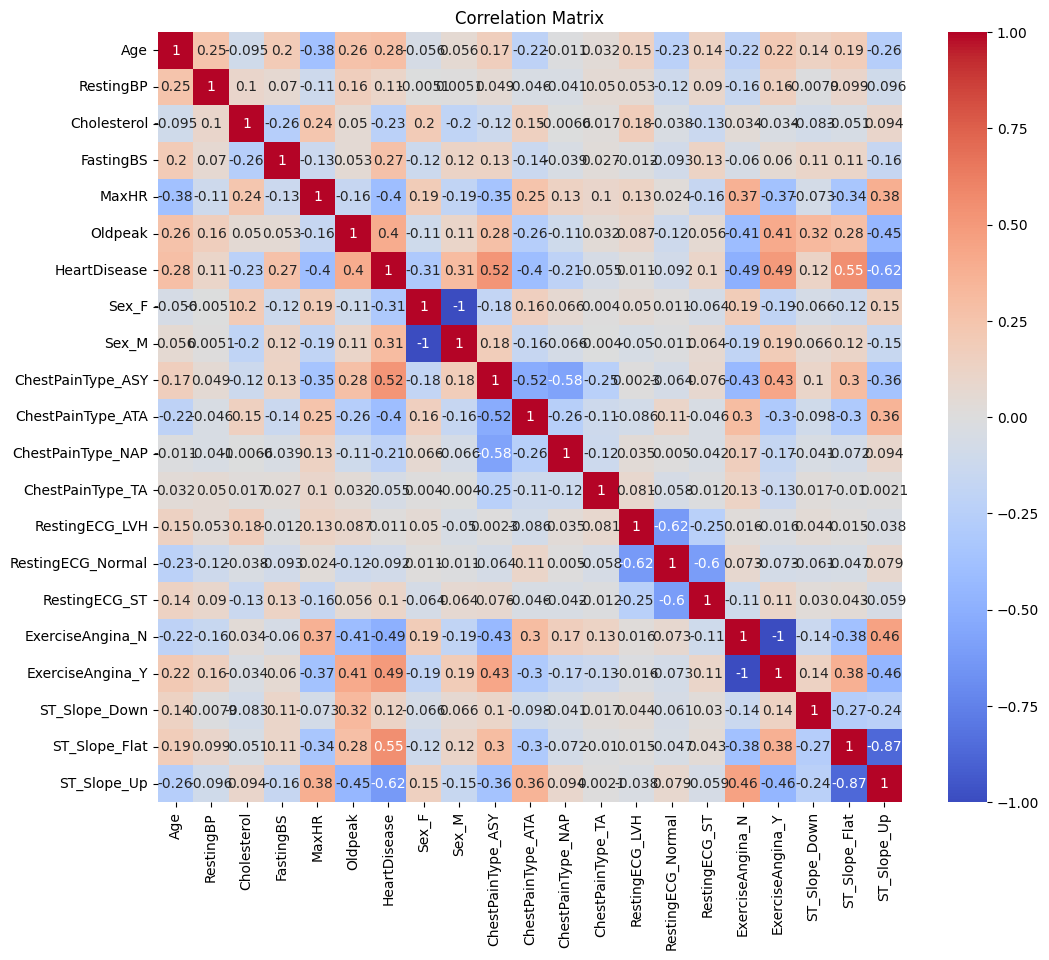

In [8]:
# 7. Calculate and plot correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Heart Disease")
profile.to_notebook_iframe()
profile.to_file("heart.html")


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\users\pc\appdata\local\programs\python\python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\users\pc\appdata\local\programs\python\python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\users\pc\appdata\local\programs\python\python39\lib\site-packages\traitlets\config\appl

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [ ]:
threshold = 0.5
high_corr = np.where(np.abs(correlation_matrix) > threshold)
high_corr = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
             for x, y in zip(*high_corr) if x != y]
print("\nHigh Correlations (>0.5):")
for feat1, feat2, corr in high_corr:
    print(f"{feat1} - {feat2}: {corr:.3f}")

In [ ]:
numerical_cols = df_encoded.select_dtypes(include=['float64', 'int64']).columns
numerical_cols = [col for col in numerical_cols if len(df_encoded[col].unique()) > 2]  # Exclude binary features

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_encoded, x=col, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
# 10. Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nData Split and Scaling Complete:")
print(f"Training set shape: {X_train_scaled.shape}")
print(f"Testing set shape: {X_test_scaled.shape}")

### Data training and performance evaluation

<div class="alert alert-block alert-danger"> 
    
1. Train the following algorithms on the generated training dataset: Gaussian Naive Bayes, KNN(K=3), and decision tree (max_depth=6).
2. Display and save the tree generated by the decision tree algorithm.
3. Implement the SVM algorithm from scratch and apply it to the dataset.
4. Print the classification reports and confusion matrices of all models on the testing set. Discuss the obtained results.
5. Display the ROC curves of the generated models in one plot.
6. Which evaluation metric do you recommend for this dataset?
7. Predict the class of the third sample from the testing set based on the best-performing model.
8. Perform the cross-validation evaluation method on the best model based on the selected metric.
</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (classification_report, confusion_matrix, 
                             ConfusionMatrixDisplay, roc_curve, auc, 
                             roc_auc_score)
from sklearn.preprocessing import StandardScaler
import numpy as np

In [ ]:
# Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
gnb_pred = gnb.predict(X_test_scaled)


In [ ]:
# KNN with K=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)


In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)

# 2. Visualize Decision Tree
plt.figure(figsize=(90,40))
plot_tree(dt, feature_names=X.columns, class_names=['No Disease', 'Disease'], 
          filled=True, rounded=True, fontsize=20)
plt.title('Decision Tree Visualization')
plt.tight_layout()
plt.show()


In [ ]:
# Convert y_train to numpy array and modify to be -1 and 1
y_train_svm = y_train.values * 2 - 1
y_test_svm = y_test.values * 2 - 1

class SimpleSVM:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent
        for _ in range(self.epochs):
            for idx in range(n_samples):
                x_i = X[idx]
                condition = y[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                
                if condition:
                    # Update weights (regularization)
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    # Update weights and bias
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y[idx]))
                    self.bias -= self.learning_rate * y[idx]
    
    def predict(self, X):
        approx = np.dot(X, self.weights) - self.bias
        return np.sign(approx)

# Fit SVM
svm = SimpleSVM()
svm.fit(X_train_scaled, y_train_svm)

# Predict
svm_pred = svm.predict(X_test_scaled)

# Convert predictions back to 0 and 1
svm_pred_binary = (svm_pred + 1) // 2

# Evaluation
print("SVM Classification Report:")
print(classification_report(y_test, svm_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred_binary)
print("\nConfusion Matrix:")
print(cm)

# Optional: Visualization of results
plt.figure(figsize=(8,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Simple SVM')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
 
models = {'GaussianNB': gnb_pred, 'KNN': knn_pred, 'DecisionTree': dt_pred, 'SVM': svm_pred}

for model, pred in models.items():
    print(f"{model} Classification Report:")
    print(classification_report(y_test, pred, zero_division=1))  
    print(f"{model} Confusion Matrix:")
    print(confusion_matrix(y_test, pred))
    print("\n")


In [ ]:
# 5. ROC Curves
plt.figure(figsize=(10,8))

# Calculate ROC for each model
models_roc = {
    'Gaussian Naive Bayes': gnb.predict_proba(X_test_scaled)[:, 1],
    'KNN (K=3)': knn.predict_proba(X_test_scaled)[:, 1],
    'Decision Tree': dt.predict_proba(X_test_scaled)[:, 1]
}

# Scikit-learn SVM for ROC (as our simple SVM doesn't have predict_proba)
from sklearn.svm import SVC
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)
models_roc['SVM'] = svc.predict_proba(X_test_scaled)[:, 1]

# Plot ROC curves
for name, y_score in models_roc.items():
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [ ]:
# 6. Recommended Evaluation Metric
# For imbalanced medical datasets, F1-score or AUC-ROC are typically recommended
print("\nRecommended Evaluation Metric:")
print("For this medical classification task, I recommend:")
print("1. AUC-ROC (Area Under the Receiver Operating Characteristic Curve)")
print("2. F1-Score")
print("Reasons:")
print("- Handles class imbalance")
print("- Provides a comprehensive view of model performance")
print("- Balances precision and recall")

In [ ]:
# 7. Predict class of third sample using best model (based on AUC-ROC)
# We'll use the SVC model for this
best_model = svc
third_sample = X_test_scaled[2].reshape(1, -1)
prediction = best_model.predict(third_sample)
prediction_proba = best_model.predict_proba(third_sample)

print("\nThird Sample Prediction:")
print(f"Predicted Class: {'Disease' if prediction[0] == 1 else 'No Disease'}")
print(f"Probability of Disease: {prediction_proba[0][1]:.4f}")


In [ ]:
# 8. Cross-validation on best model
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
print("\nCross-Validation Results:")
print(f"ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")